In [1]:
import tensorflow as tf

/home/mj/.conda/envs/ten/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
a = tf.constant([2,2],name='a')
b = tf.constant([[0,1],[2,3]],name='b')
x = tf.multiply(a,b,name='dot_product')
with tf.Session() as sess:
    #写到日志文件里去
    writer = tf.summary.FileWriter('./graphs/const_mul',sess.graph)
    print(sess.run(x))
writer.close()

[[0 2]
 [4 6]]


In [2]:
x =2 
y = 3
add_op = tf.add(x,y)
mul_op = tf.multiply(x,y)
useless = tf.multiply(x,add_op)
pow_op = tf.pow(add_op,mul_op)
with tf.Session() as sess:
    z = sess.run(pow_op)

## 启动TensorBoard
命令行端运行
$python [yourprogram].py

$ tensorboard —logdir=“./graphs” —port 7001

打开浏览器访问:http://localhost:7001

## 指定CPU or GPU去完成session里的运算
```
#构建graph
with tf.device('/gpu:2'):
    a = tf.constant([1.0,2.0],name='a')
    b = tf.constant([1.0,2.0],name='b')
    c = tf.matmul(a,b)
    
#构建session 设置log_device_placement 为True
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

#进行op定义运算
print (sess.run(c))
```


## 1.准备数据

/home/mj/.conda/envs/ten/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


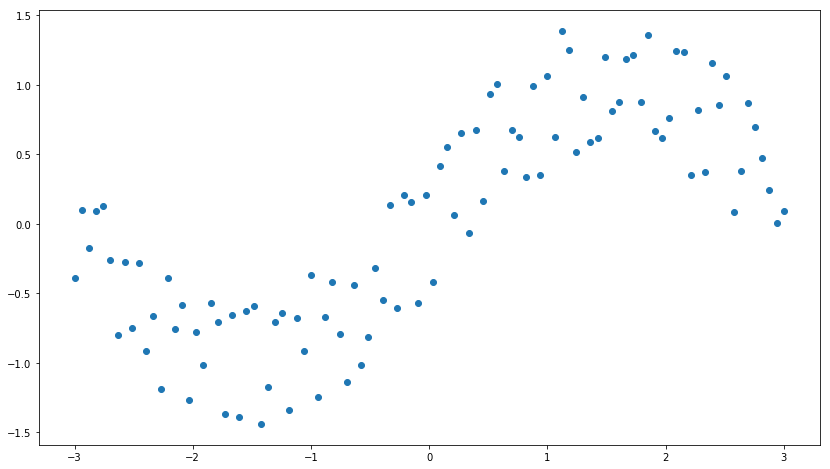

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(14,8)

n_observations = 100
xs = np.linspace(-3,3,n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5,0.5,n_observations)
plt.scatter(xs,ys)
plt.show()

## 2. 准备好placeholder

In [2]:
X = tf.placeholder(tf.float32,name='X')
Y = tf.placeholder(tf.float32,name='Y')

## 3.初始化参数/权重

In [3]:
W = tf.Variable(tf.random_normal([1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

## 4.计算年预测结果

In [4]:
Y_pred = tf.add(tf.multiply(X,W),b)

## 5.计算损失函数值

In [5]:
loss = tf.square(Y - Y_pred,name='loss')

## 6.初始化optimizer

In [6]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [7]:
optimizer

<tf.Operation 'GradientDescent' type=NoOp>

## 7.指定迭代次数，并在session里执行graph

In [8]:
n_smaple = xs.shape[0]
init = tf.global_variables_initializer()
with tf.Session() as sess:
    #记得初始化所有变量
    sess.run(init)
    writer = tf.summary.FileWriter('./graphs/linear_reg',sess.graph)
    
    #训练模型
    for i in range(50):
        total_loss = 0
        for x,y in zip(xs,ys):
#             print ('x:{0},y:{1}'.format(x,y))
            #通过feed_dic把数据灌进去
            _, l  = sess.run([optimizer,loss],feed_dict={X:x,Y:y})
            total_loss +=l
        if i%5 == 0:
            print ('Epoch {0}:{1}'.format(i,total_loss/n_smaple))
        
    #关闭writer
    writer.close()
    
    #取出w和b的值
    W, b = sess.run([W,b])

Epoch 0:[2.0883698]
Epoch 5:[0.21778367]
Epoch 10:[0.21778461]
Epoch 15:[0.21778461]
Epoch 20:[0.21778461]
Epoch 25:[0.21778461]
Epoch 30:[0.21778461]
Epoch 35:[0.21778461]
Epoch 40:[0.21778461]
Epoch 45:[0.21778461]
